# GML - Mini-Challenge 3 - FS 2022

**Ausgabe:** Montag, 23. Mai 2022  
**Abgabe:** Sonntag, 12. Juni 2022, bis 24 Uhr 

In diesem Mini-Challenge untersuchen wir die Struktur eines Datensatzes von Sonnenspektren.  

Cédric Huwyler hat uns freundlicherweise die Daten dafür bereitgestellt. Es handelt sich dabei um Daten gesammelt von der Nasa Iris Mission: https://iris.lmsal.com/  

Du findest etwas mehr Kontext auf folgender DS-Spaces Seite: https://ds-spaces.technik.fhnw.ch/iris-centroid-browser/  

#### Vorgaben zu Umsetzung und Abgabe

- Code muss in python geschrieben werden.
- Wir entwickeln die meisten Algorithmen selber. Wenn nicht explizit anders verlangt, dürfen bloss die folgenden Bibliotheken verwendet werden: numpy, matplotlib, seaborn, pandas
- Der Code muss lauffähig sein bei Ausführung im Docker-Container des Trainingcenters. 
- Es darf kein Code ausgelagert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Titel, Colorbar, ..), sodass der Plot einfach verstanden werden kann.
- Zu jedem Plot gibt es eine kurze Diskussion, welche den Plot erklärt und die wichtigsten Einsichten die damit sichtbar werden festhält.  
- Als **Abgabe** zählt der letzte Commit in deinem Fork des Repos vor Abgabetermin.  


- **Bitte löschen, duplizieren oder verschieben sie die vorhandenen Zellen nicht**. Dies führt zu Problemen bei der Korrektur. Sie dürfen aber beliebig viele weitere Zellen hinzufügen.
- Bitte importiere Daten mit **relativen Pfaden** innerhalb des Repos.

Für die Erarbeitung der Inhalte darf zusammengearbeitet werden. Die Zusammenarbeit ist dabei aber auf algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text von anderen oder vom Internet kopiert werden.**

---

### Aufgabe 1 (4 Punkte)

Lade den Datensatz der Sonnenspektren von folgendem Link herunter ( https://drive.switch.ch/index.php/s/SfcNAisJNpTxCrh ) und füge ihn dem `data`-Verzeichnis in diesem Repo zu (der Datensatz soll nicht committed und gepushed werden). Lade dann (`data/iris_sun_spectra.npy`) mit der Funktion `np.load`. Verwende einen relativen Pfad.

Der Wellenlängenbereich der Spektren ist 279.414 nm - 280.572 nm. Die Intensität der Spektren ist auf 1 normiert.  

Visualisiere einige (~ 100) zufällige Beispiele nebeneinander in einer Figure in Subplots und beschreibe was du vorfindest.

**Daten einlesen**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# YOUR CODE HERE
df_iris = np.load('../../data/iris_sun_spectra.npy')
print(df_iris.shape)
#df_iris[0, :]

(791537, 240)


**Visualisieren 100 Beispiele**

df_plot_100.shape=(100, 240)


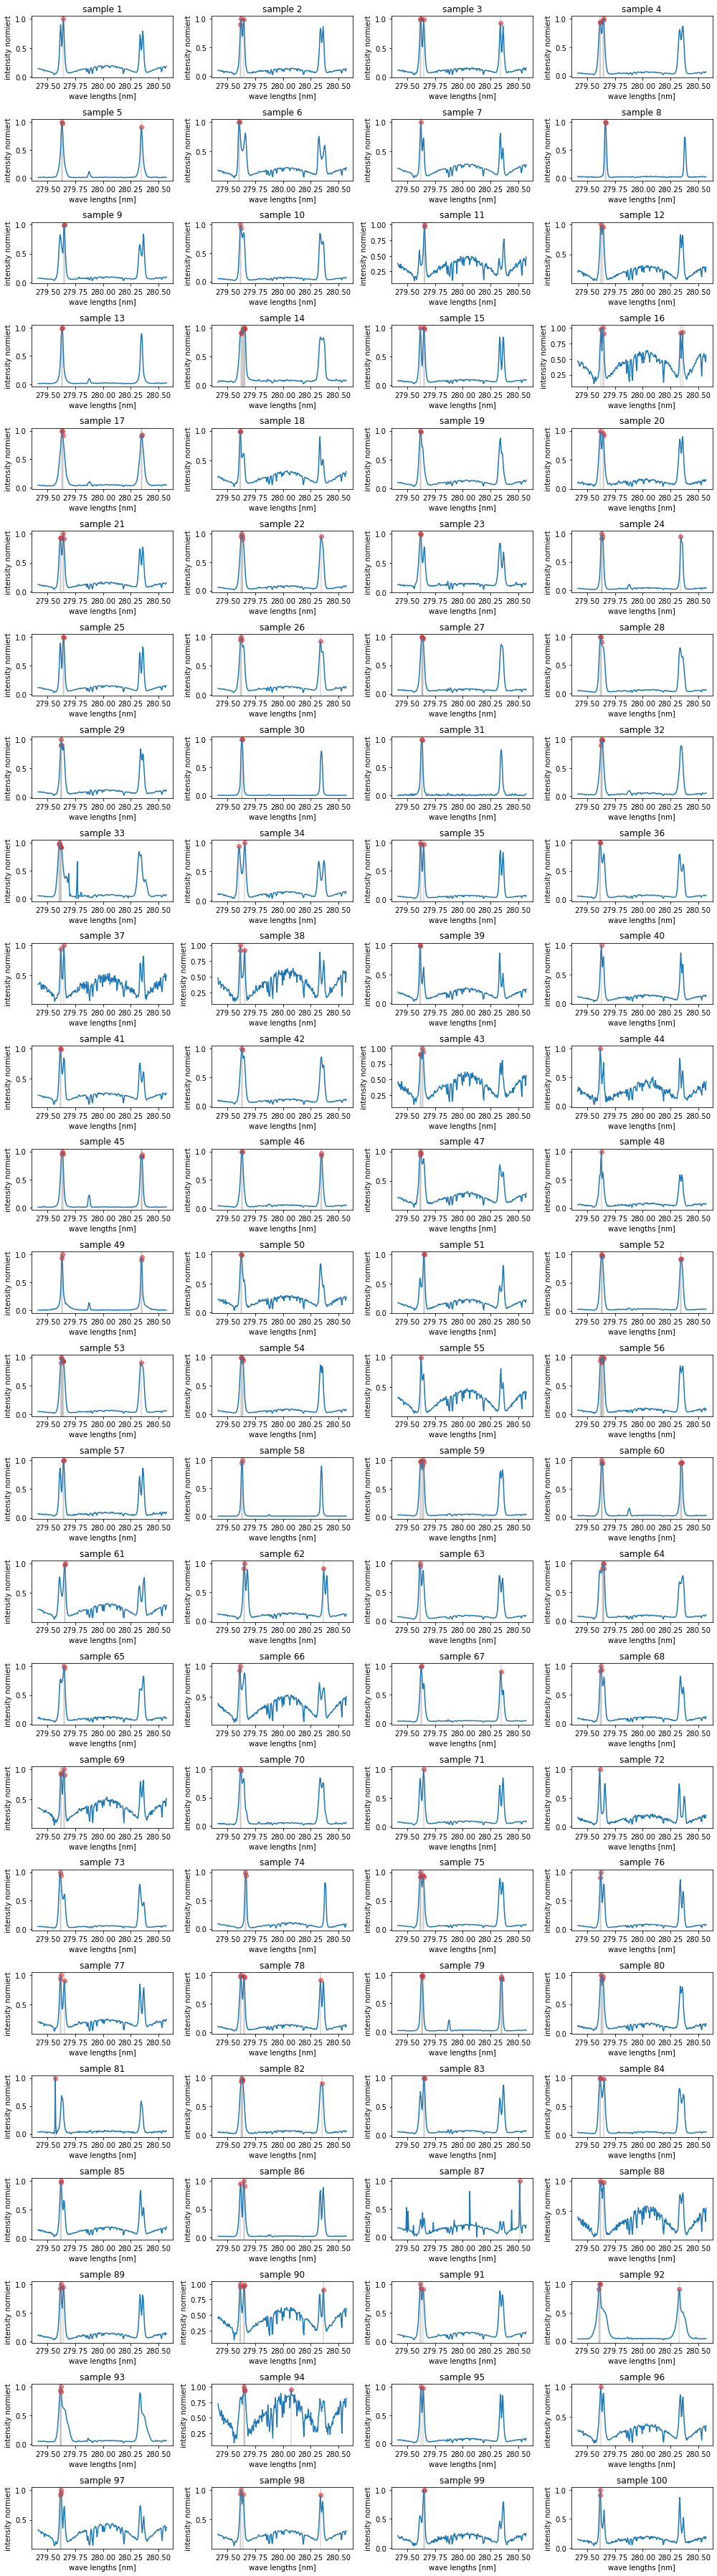

In [3]:
np.random.seed(42)

# 100 zufällige Beispiele auswählen
idx_rnd = np.random.randint(0, df_iris.shape[0], 100)
df_plot_100 = df_iris[idx_rnd, :].copy()
print(f'{df_plot_100.shape=}')

# plote die zufälligen Beispiele
fig, ax = plt.subplots(25, 4, figsize=(14,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label = np.linspace(279.414, 280.572, 240)

for i, data in enumerate(df_plot_100):
    ax[i].plot(x_label, df_plot_100[i, :])
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')
    
    # zeichnen Picks grösser 0.8
    for k, point in enumerate(data):
        if point > 0.9:
            ax[i].scatter(x_label[k], point, color='red', alpha=0.5)
            ax[i].axvline(x_label[k], color='gray', alpha=0.3)
    
plt.tight_layout()
plt.show()

In allen Samples fallen die zwei Picks, bei denen die Intensität auf nahe zu 1 springt, als Muster auf. Zudem gibt es zwischen diesen Picks in vielen Fällen ein Aufstieg und Abfallen der Intensität wobei die maximale Stärke der Intensität unterschiedlich sein kann. Dieses Muster kann auch unterhalb und oberhalb der gemessenen Wellenlänge beobachtet werden

### Aufgabe 2 (8 Punkte)

Schreibe eine Klasse, analog einer Transformer-Klasse in scikit-learn, welche die Principal Components mittels Singular Value Decomposition berechnet.  
Für einen beliebigen Datensatz sollen dabei alle möglichen Principal Components berechnet werden.  

Nach Ausführen der `fit`-Methode, soll ein Objekt die Attribute `components_` und `variance_` aufweisen, welche die Principal Components als Zeilenvektoren, bzw. die Varianz des Datensatzes entlang der Komponenten ausweist.  

Konstruiere und visualisiere ein einfaches 2-dimensionales Beispiel mit welchem du zeigst, dass deine Klasse wie erwartet funktioniert. Zeige insbesondere, dass die erste Principal Component tatsächlich in Richtung der grössten Varianz zeigt und dass die Berechnung der Varianzen entlang der Principal Components berechnet stimmen. Erkläre diese Verifikation der Funktionstüchtigkeit.

In [4]:
import numpy as np
import scipy as sp

class PCA():
    '''
    Berechnet die Pricipal Componets mit SVD eines Datensatzes
    
    '''
    def __init__(self, n_components=None):
        '''
        df: Datendatz für PCA berechnung
        '''
        self.n_components = n_components
        #self.X = np.array([])
        self.U_ = np.array([])
        self.S_ = np.array([])
        self.VT_ = np.array([])
        self.components_ = np.array([])
        self.variance_ = np.array([])    
        self.eigvals_ = np.array([])
        
    def fit(self, X, print_info=False):
        '''     
        output: components_ als Zeilenvektor und variance_ entlang PC
        '''
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X)
        #self.U_, self.S_, self.VT_ = sp.linalg.svd(X) 
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_)   
        
        if print_info:
            print(f'{self.variance_=}')   
            print(f'sing. Werte: {S=}')
        
        return self
    
        
    def fit_transform(self, X, k_components=None, var_proz=None):
        '''
        output: df_reduced,berechnet PCA und reduziert die Daten
        '''
        # mean center data
        X = PCA.center_data(X)
        
        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X, full_matrices=False)  
        
        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        self.eigvals_ = np.square(self.S_)
        
        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte        
        self.variance_ = self.eigvals_ / np.sum(self.eigvals_)
        self.variance_ = self.variance_[:k_components]
        
        # sklearn Ansatz, gleich wie über die Eigenwerte
        #variance_exp = self.eigvals_ / (X.shape[0]-1)
        #self.variance_ = variance_exp / np.sum(variance_exp)
        
        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        self.components_ = self.components_[:k_components, :] 
        
        if var_proz != None:
            k_comp = self.calc_var_proz(X, var_proz)
            print(f'{k_comp} Komponenten notwendig für >= {var_proz}')
        else:
            k_comp = k_components
            
        S_matrix = np.diag(self.S_[:k_comp])    
        U = self.U_[:, :k_comp]
        VT = self.VT_[:k_comp, :]
        
        # Berechne Daten Reduktion PCA, beide liefern die gleichen Resulate mit 
        # S_matrix schneller?! X_approx wäre dann U @ S_martix @ VT
        #X_pca = (VT @ X.T).T
        X_pca = U @ S_matrix
                    
        return X_pca   
    
    def fit_with_covar(self, X):
        '''
        Funktion verwendet die covarianzmatrix um die Principal Components (Eigenvektoren) zu berechnen
        outut: components_ als Zeilenvektor und variance_ entlang PC
            '''
        # mean center data
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)

        # Singulärwertzerlegung der Covarianzmatrix
        self.U_, self.S_, self.VT_ = np.linalg.svd(X_cov, full_matrices=True)

        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_

        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte
        self.variance_ = self.S_ / np.sum(self.S_)  

        return self      
        
    def fit_transform_covar(self, X, k_components=None, var_proz=None):
        '''
        output: df_reduced,berechnet PCA und reduziert die Daten
        '''
        # mean center data
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)

        # Singulärwertzerlegung
        self.U_, self.S_, self.VT_ = np.linalg.svd(X_cov, full_matrices=True)  

        # Eigenwerte sind die quadrierten singulärwerte aus der Matrix S
        #self.eigvals_ = np.square(self.S_)

        # Berechne varianz durch die Eigenwerte, Eigenwert / Summe aller Eigenwerte        
        self.variance_ = self.S_ / np.sum(self.S_)
        self.variance_ = self.variance_[:k_components]

        # Principal Componenten erstellen, (Eigenvektoren je nach Deffinition)
        self.components_ = self.VT_
        self.components_ = self.components_[:k_components, :] 

        if var_proz != None:
            k_comp = self.calc_var_proz(X, var_proz)
            print(f'{k_comp} Komponenten notwendig für >= {var_proz}')
        else:
            k_comp = k_components

        S_matrix = np.diag(self.S_[:k_comp])    
        U = self.U_[:, :k_comp].copy()
        VT = self.VT_[:k_comp, :].copy()

        # Berechne Daten Reduktion PCA, Inputdaten mit den Anzahl k Eigenvektoren reduzieren
        X_pca = (X @ U)

        return X_pca           

        
    
    def calc_var_proz(self, X, limit_prozent):
        '''
        Berechnet die Anzahl notwendigen Komponenten um eine bestimmte Varianz zu behalten
        '''
        # mean center data
        X = PCA.center_data(X)

        # Berechnnen der Covarianzmatrix
        X_cov = PCA.covariance_matrix(X, numpy=False)
        
        _, S, _ = np.linalg.svd(X_cov)
        
        #eig_vals = np.square(S)
        
        #variance = eig_vals / np.sum(eig_vals)
        variance = S / np.sum(S)
        #print(variance)
        
        for k in range(1, len(variance)+1):
            var_proz = np.sum( variance[:k] )
            #print(f'{var_proz=}')
            
            if var_proz > limit_prozent:
                return k
        return len(variance)
            
    
    def plot_variance_explained(self, k_comp=10, limit=0.95, cumsum=True, figsize=(20,6)):
        '''
        Zeichnet die prozuentale Variance explained mit oder ohne cumsum
        '''
        fig = plt.figure(figsize=figsize)
        
        # zeichen Variance
        x_label = ['pc' + str(i+1) + ', ' + str(var.round(3)) for i, var in enumerate(self.variance_)]
        
        print(len(x_label), len(self.variance_))

        plt.bar(x_label[:k_comp], self.variance_[:k_comp])
        if cumsum:
            plt.scatter(np.arange(k_comp), np.cumsum(self.variance_[:k_comp]), color='red', label='cumsum(variance)')
            plt.legend(loc='center right')
        plt.ylim(0, 1)
        plt.axhline(limit, color='red', alpha=0.3)
        plt.xticks(rotation=90)
        plt.xlabel('Principal Components')
        plt.ylabel('% of variance explained')
        plt.grid()
        plt.show()
    
    def rekonstruktion(self, X_pca, k_components):
        '''
        Kehrt PCA um mithilfe von SVD
        k_components: Anzahl PC verwendet
        '''
        VT = self.VT_
        U = self.U_
        S = self.S_
        print(f'U:{U.shape}, S:{np.diag(S[:k_components]).shape}, X_PCA{X_pca.shape}')
        X_rekonstruiert = X_pca @ U[:, :k_components].T
        #print(X_reko.shape)
        
        return X_rekonstruiert
    
    @staticmethod
    def center_data(X):
        X_centered = X - X.mean(axis=0)
        return X_centered
    
    @staticmethod
    def normalize(X):
        X_norm = (X - X.mean(axis=0)) / X.std(axis=0)
        return X_norm
    
    @staticmethod
    def covariance_matrix(X, numpy=False):
        # center data, damit Mittelwert = 0, wenn bereits zentriert dann keinen Einfluss
        PCA.center_data(X) 
        
        # Berechnen der Covarianzmatrix       
        if numpy:
            cov_matrix = np.cov(X)
        else:                   
            n = X.shape[0]
            cov_matrix = 1/n * (X.T @ X)
        
        return cov_matrix        

**Einfaches 2-d Beispiel test**

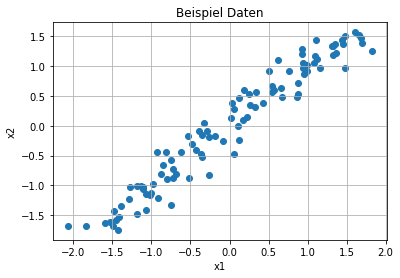

In [5]:
# Random Datensatz aus Aufgabenstellung
np.random.seed(42)
mu, n = 5, 100
x1 = np.random.uniform(mu, size=n)
# y mit zusätzliches Rauschen
x2 = 3*x1 + np.random.normal(0, 1, n)

# Standardisierung der Daten
X_sample = np.vstack([x2, x1]).T
X_sample_norm = PCA.normalize(X_sample)

# zeichnen der Beispieldaten
plt.scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Beispiel Daten')
plt.grid()
plt.show()

**Zeigen das PCA funktioniert**  
Die Klasse PCA() berechnet mit Singulätwertzerlegung die Eigenwerte und Eigenvektoren der Covarianzmatrix von X_sample_norm. Die Daten sollen in Standardisierter Form vorliegen (PCA hat eine Funktion dafür). Components gibt die Eigenvektoren zurück und variance die prozuentale Erklärung der Daten durch die einzelnen Components

In [6]:
# Erstelle Objekt
pca = PCA()

# fit methode
pca.fit(X_sample_norm, print_info=False)

# Erstelle Objekt, covarianz
pca_covar = PCA()

# fit methode, covarianz
pca_covar.fit_with_covar(X_sample_norm)

**Zeigen dass die grösste PC entlang der grössten Varainz zeigt**  
components oder loading scores beschreiben die Eigenvektoren der Covarianz Matrix (SVD() -> Matrix V).  
In den Beispieldaten enthalten sind zwei Attribute x1 und x2 beide erhalten einen Eigenvektor der entlang der grössten Varianz der Daten zeigt. Für die PCA kann die Achsen anhand der Eigenvektoren gedreht werden.

In [7]:
print('Eigenwerte:')
print(pca.eigvals_)
print('Principal Components:')
print(pca.components_[:5,:])
print()

print('Eigenwerte Covarianzmatrix:')
print(pca_covar.S_)
print('Principal Components Covarianzmatrix:')
print(pca_covar.components_[:5,:])

Eigenwerte:
[197.16069344   2.83930656]
Principal Components:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenwerte Covarianzmatrix:
[1.97160693 0.02839307]
Principal Components Covarianzmatrix:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


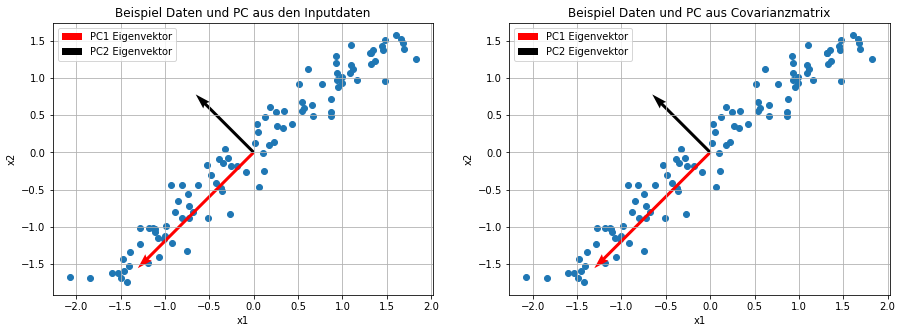

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

# zeichnen der Beispieldaten mit den Eigenvektoren x1 und x2
origin = (0,0)

ax[0].scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
ax[0].quiver(*origin, pca.VT_[0][0], pca.VT_[0][1], width=0.008, scale_units='xy', scale=0.5, color='red', label='PC1 Eigenvektor')
ax[0].quiver(*origin, pca.VT_[1][0], pca.VT_[1][1], width=0.008, scale_units='xy', scale=1, color='black', label='PC2 Eigenvektor')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
ax[0].set_title('Beispiel Daten und PC aus den Inputdaten')
ax[0].grid()
ax[0].legend()

ax[1].scatter(X_sample_norm[:,0],  X_sample_norm[:,1])
ax[1].quiver(*origin, pca_covar.VT_[0][0], pca_covar.VT_[0][1], width=0.008, scale_units='xy', scale=0.5, color='red', label='PC1 Eigenvektor')
ax[1].quiver(*origin, pca_covar.VT_[1][0], pca_covar.VT_[1][1], width=0.008, scale_units='xy', scale=1, color='black', label='PC2 Eigenvektor')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
ax[1].set_title('Beispiel Daten und PC aus Covarianzmatrix')
ax[1].grid()
ax[1].legend()

plt.show()

Wie in den obigen Grafiken erkennbar ist, sind die Eigenvektoren aus den Inputdaten und die Eigenvektoren der Covarianzmatrix aus den Inputdaten identisch.

**Zeigen der prozuentalen Erklärung der Varianz** je Prinzipal Component für einmal `svd(Inputdaten)` und `svd(covarianz)`.  
In beiden Fällen erklärt pc1 rund 98% der Variation der Daten und pc2 die restliche Variation von 0.1%.

2 2


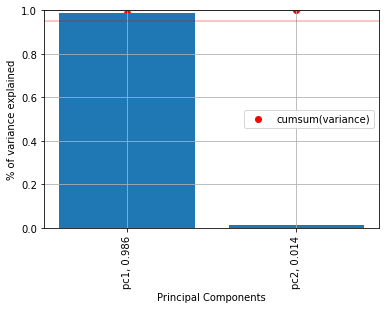

In [9]:
# zeichen Variance Inputdaten
pca.plot_variance_explained(k_comp=2, limit=0.95, figsize=(6,4))

2 2


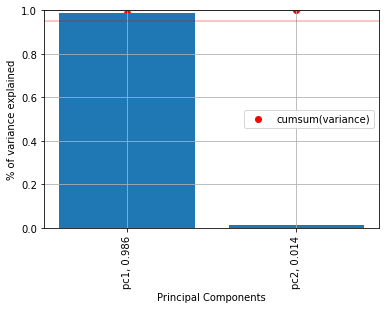

In [10]:
# zeichen Variance aus der Covarianzmatrix der Inputdaten
pca_covar.plot_variance_explained(k_comp=2, limit=0.95, figsize=(6,4))

**Zeigen das PCA in Richtung der grössten Varianz entlang PCA berechnet wird**  
Durch die Funktion U, S, V = np.linalg.svd(X) werden die Eigenwerte in S und die Eigenvektoren in V bereits nach den grössten Eigenwerten (oder wichtigste Prinzipal Componenten) sortiert. Wird das Produkt aus den Eigenvektoren mit den X Daten verrechnet wird eine Drehung der Daten entlang der wichtigsten PC erstellt. In unserem Fall entspricht dies x1 aus den Beispieldaten die auf der x-achse mit pc1 abgebildet sind und die höchste Variation der Daten zeigt. Die zweit wichtigste PC landet auf der y-achse in pc2. Bei höheren Dimension gilt das gleiche Muster.

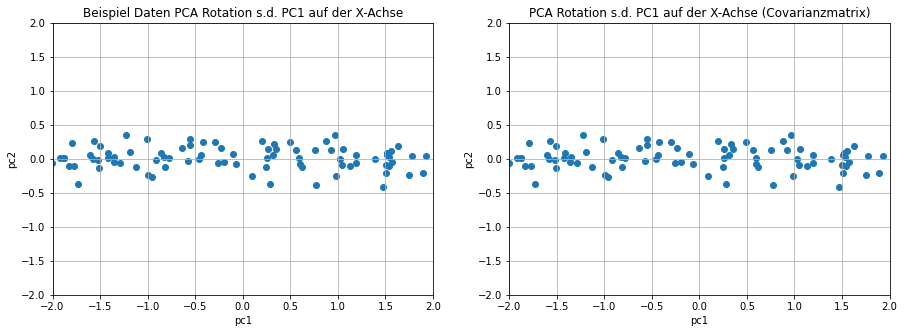

In [11]:
# PCA Analysis
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 2)
PCA_out_covar = pca.fit_transform_covar(X_sample_norm, 2)

#zeichne der Daten entlang der grössten Principal Komponente
ax[0].scatter(PCA_out[:,0],  PCA_out[:,1])
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('pc2')
ax[0].set_title('Beispiel Daten PCA Rotation s.d. PC1 auf der X-Achse')
ax[0].grid()

#zeichne der Daten entlang der grössten Principal Komponente
ax[1].scatter(PCA_out_covar[:,0],  PCA_out_covar[:,1])
ax[1].set_ylim(-2, 2)
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel('pc1')
ax[1].set_ylabel('pc2')
ax[1].set_title('PCA Rotation s.d. PC1 auf der X-Achse (Covarianzmatrix)')
ax[1].grid()

plt.show()

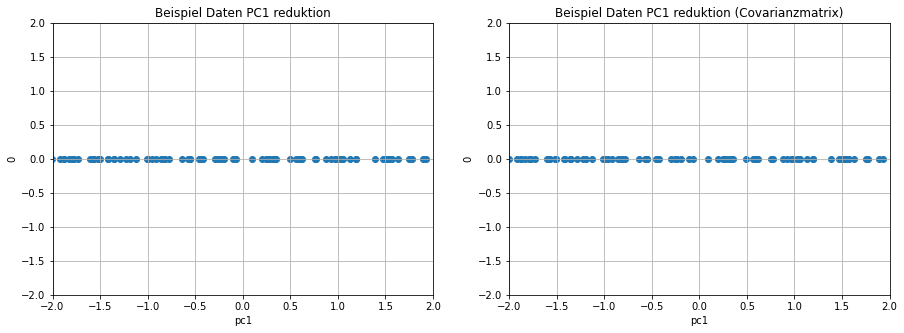

In [12]:
# PCA Analysis
# PCA Analysis
fig, ax = plt.subplots(1,2, figsize=(15,5))

# Drehen der Daten mit den Eigenvektoren
PCA_out = pca.fit_transform(X_sample_norm, 1)
PCA_out_covar = pca.fit_transform_covar(X_sample_norm, 2)

#zeichne der Daten entlang der grössten Principal Komponente
ax[0].scatter(PCA_out[:,0],  np.zeros(len(PCA_out)))
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(-2, 2)
ax[0].set_xlabel('pc1')
ax[0].set_ylabel('0')
ax[0].set_title('Beispiel Daten PC1 reduktion')
ax[0].grid()

#zeichne der Daten entlang der grössten Principal Komponente
ax[1].scatter(PCA_out_covar[:,0],  np.zeros(len(PCA_out_covar)))
ax[1].set_ylim(-2, 2)
ax[1].set_xlim(-2, 2)
ax[1].set_xlabel('pc1')
ax[1].set_ylabel('0')
ax[1].set_title('Beispiel Daten PC1 reduktion (Covarianzmatrix)')
ax[1].grid()

plt.show()

Neben der .fit() Methode ist in der Klasse PCA() auch eine .fit_transform() Methode für eine direkte Matrix Reduktion verfügbar. Es können die Anzahl verwendeter Komponenten übergeben werden oder eine mindest Anforderung an die prozuentale Erklärung der Daten gefordert werden. Übliche Werte liegen so zwischen 0.9 - 0.99.

**Ausgeben der Reduzierten Daten**

In [13]:
# fit transform für reduzierte matrix nach Anzahl Komponenten 
X_reduced = pca.fit_transform(X_sample_norm, 2)
# fit transform für reduzierte matrix nach Anzahl Komponenten 
X_reduced_covar = pca_covar.fit_transform_covar(X_sample_norm, 2)
print()
print(f'% variance explained: {pca.variance_}')
print(f'Eigenwerte: {pca.eigvals_}')
print(f'Eigenvektoren: {pca.VT_}')


% variance explained: [0.98580347 0.01419653]
Eigenwerte: [197.16069344   2.83930656]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Original Daten

In [14]:
# Original Data
X_sample_norm[:5,:]

array([[ 0.32557031,  0.32311215],
       [-1.59762249, -1.62343393],
       [-0.80322459, -0.88450935],
       [-0.92949529, -0.43404902],
       [ 0.93558939,  1.06136481]])

Reduzierte Daten mit svd auf Inputdaten und durch die Eigenvektoren der Covarianzmatrix der Inputdaten

In [15]:
# Reduced Data
print('Reduzierte Inputdaten')
print(X_reduced[:5,:])
print()

# Reduced Data Covarianzmatrix
print('Reduzierte Inputdaten (PC Covarianzmatrix)')
print(X_reduced_covar[:5,:])

Reduzierte Inputdaten
[[-4.58687769e-01 -1.73817921e-03]
 [ 2.27763084e+00 -1.82514388e-02]
 [ 1.19340811e+00 -5.74770041e-02]
 [ 9.64171430e-01  3.50333416e-01]
 [-1.41205986e+00  8.89366561e-02]]

Reduzierte Inputdaten (PC Covarianzmatrix)
[[-4.58687769e-01 -1.73817921e-03]
 [ 2.27763084e+00 -1.82514388e-02]
 [ 1.19340811e+00 -5.74770041e-02]
 [ 9.64171430e-01  3.50333416e-01]
 [-1.41205986e+00  8.89366561e-02]]


In der Matrix X_reduced ist ersichtlich dass die Werte der wichtigsten PC (pc1) erhalten bleibt, pc1 kann 89% der Daten Variation erklären.

**Testen ob PCA von sklearn zum selben Ergebniss kommt**

In [16]:
import numpy as np
from sklearn.decomposition import PCA as PCA_sklearn

# Berechnung der Varianz und Eigenwerte
pca_sklearn = PCA_sklearn()
pca_sklearn.fit(X_sample_norm)
print(f'% variance explained: {pca_sklearn.explained_variance_ratio_}')
print(f'Eigenwerte: {pca_sklearn.singular_values_**2}')
print(f'Eigenvektoren: {pca_sklearn.components_}')

% variance explained: [0.98580347 0.01419653]
Eigenwerte: [197.16069344   2.83930656]
Eigenvektoren: [[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [17]:
pca_sklearn = PCA_sklearn(n_components=2)
pca_sklearn.fit_transform(X_sample_norm)[:5]

array([[-4.58687769e-01,  1.73817921e-03],
       [ 2.27763084e+00,  1.82514388e-02],
       [ 1.19340811e+00,  5.74770041e-02],
       [ 9.64171430e-01, -3.50333416e-01],
       [-1.41205986e+00, -8.89366561e-02]])

**Test PCA eigene Klasse im Vergleich zu PCA Sklearn**  
Die Resultate sind identisch, somit gezeigt und geprüft das die Berechnungen korrekt sind.

### Aufgabe 3 (6 Punkte)

Zeige (analytisch), dass die Principal Components die Eigenvektoren der Kovarianzmatrix eines Datensatzes sind. Was sind die Eigenwerte?  

Lies das Kapitel von Jolliffe (Jolliffe, Principal Component Analysis, Springer, 2002) im Verzeichnis Literatur in diesem Repo für Inspiration.  

Erkläre was dies bedeutet.

**Zeigen das Principal Components die Eigenvektoren der Kovarianzmatrix des Datensatzes sind** 

Laut Jolliffe [Principal Component Analysis, Springer, 2002, Seite 6] werden die Principal Components von PCA manchmal als Eigenvektoren ($\alpha_k$) der Kovarianzmatrix  genannt. Er schreibt aber dass die Principal Components besser als die abgeleiteten Variablen $\alpha_k^Tx$ und die Eigenvektoren $\alpha_k'$ als 'loadings' der PC's zu beschreiben wären.  
Bei der Recherche in Büchern und im Web werden beide Varianten verwendet, daher sollte man darauf achten und kurz prüfen auf welche Form oder Definition sich die Authoren beziehen.

**Die Kovarianzmatrix** von X kann folgend Abgebildet werden:  
$\bar{x}$ ist dabei der mean vector von $x_i$

$$ \Sigma = Cov(X) = \frac{1}{n-1} \left( (X - \bar{x}) (X - \bar{x}) \right) $$

Die Kovarianzmatrix ist eine symetrische Matrix und hat besondere Eigenschaften, von denen profitiert werden kann:
- Alle Eigenwerte einer reellen symetrischen Matrizen sind reell.
- Die Determinatante ist immer grösser gleich 0
- Die Eigenvektoren zu unterschiedlichen Eigenwerten sind immer orthogonal (senkrecht) zueinander (PC's orthogonal zueinander).
- Symetrische Matrizen ($X$) sind diagonalisierbar $X = V D V^T$,

Die diagonalisierung von $X = V D V^T$ stammt aus der Form $XV = VD$ oder üblicherweise als $XV = \lambda V$. Ein Eigenvektoren, einer Matrix $X$, behält seine Richtung unter der linearen Abbildung mit $X$. Eine Streckung oder Stauchung des Eigenvektors ist möglich (auch zu sehen mit $\lambda$ als Faktor von $\lambda V$ 

Bei der PCA können mit Hilfe der Singelwertzerlegung die Eigenvektoren berechnet werden $ X = U\Sigma V^T$. Die Eigenvektoren mit den höchsten Singulärwerten, zeigen in die Richtung der grössten Variation der Daten, sprich dem wichtigsten Principal Componentes. Die Anzahl der benötigten PC ist von Intresse um beispielsweise 90% der Information von Daten beizubehalten. 

Die Principal Componentes berechnen sich anschliessend aus $P_{rincipal} C_{omponentes} = V[:k,:] X^T$, dabei steht $k$ für die Anzahl PC die man verwenden möchte für die Dimensionreduktion.  
Ein Beispiel für $k=2$:

$$ PC = \left( \begin{matrix} v_{00} & v_{01} & v_{01} \\ v_{10} & v_{11} & v_{11} \end{matrix} \right) 
\left( \begin{matrix} x_{00} & x_{01} & x_{02} \\ x_{10} & x_{11} & x_{12} \\ x_{n0} & x_{n1} & x_{n2} \end{matrix} \right) $$

Dabei werden k Eigenvektoren $v$ die in Richtung der höchsten Variance der Daten zeigen, mit den original Daten $x$ verrechnet. Es folgt eine Projektion der Daten in Richtung der Eigenvektoren mit der höchsten Varianz.

Somit erreicht PCA eine Dimensionsreduktion in dem sie die orginal Daten entlang der k wichtigsten Eigenvektoren projeziert. 

**Was sind Eigenwerte?**  
In vielen Anwendungen beschreiben Eigenwerte ($\lambda$) Eigenschaften von mathematischen Modellen. 
- In der Form $XV = \lambda V$ streckt oder staucht der Eigenwert den Eigenvektor und entspricht der gleichen linearen Abbildung wie $X \cdot V$
- Bei symetrischen Matrizen kann die Determinaten aus dem Produkt der Eigenwerte berechnet werden (nützlich um zu prüfen ob eine Matrix invertierbar ist. ($det=0$ dann nicht singulär, keine eindeutige Lösung und nicht invertierbar.)
- In PCA mit Singulärwertzerlegung sitzen die Eigenwerte in Wurzelform in den Singulärwertmatrix $\Sigma$ und können berechnet werden ($\lambda = \sigma^2$). Je höher ein Eigenwert/Singulärwerrt umso mehr Varianz der Daten können erklärt werden, darum auch die Auswahl der Eigenvektoren anhand der höchsten Eigenwerten. 


### Aufgabe 4 (11 Punkte)

Berechne die Principal Components des Datensatzes der Sonnenspektren.  

Zeichne die kumulative Summe der Varianzen entlang der aufsteigenden Principal Components.  

Wieviele Components brauchen wir, um 95 % der Varianz des Datensatzes zu erhalten?  
Rekonstruiere die Spektren aus diesen $K$ Components und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die $K$ Principal Components.  

Projiziere die Spektren auf die ersten beiden Principal Components und visualisiere die Spektren im neuen Koordinatensystem.  

Diskutiere sämtliche Plots.

**Verwenden der Daten mit PCA führte zu Systemproblemen**  
Folgende Fehler Meldung erscheint wenn probiert wird alle Datenpunkte mit PCA zu verwenden: 

In [18]:
# YOUR CODE HERE
pca_iris = PCA().fit_with_covar(df_iris)

In [19]:
#np.random.seed(42)

# 500 zufällige Beispiele auswählen
#idx_rnd = np.random.randint(0, df_iris.shape[0], 500)
#df_iris_cut = df_iris[idx_rnd, :].copy()
#print(f'{df_iris_cut.shape=}')

In [20]:
# center data / Standardiesere Daten
#df_iris_cut_cent = PCA.center_data(df_iris_cut)
#df_iris_cut_norm = PCA.normalize(df_iris_cut)

In [21]:
#pca_iris = PCA().fit(df_iris_cut_cent)

**Zeichne kumulative Summe der Varianz**  
Es braucht 6 Principal Components aus den totalen 240 Stück um 95% der Variation in den Daten zu erklären.

240 240


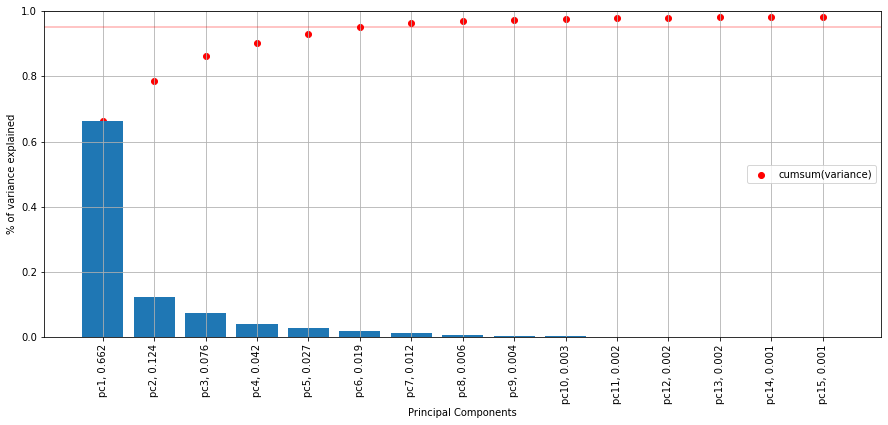

In [22]:
pca_iris.plot_variance_explained(k_comp=15, limit=0.95, figsize=(15,6))

In [23]:
# festlegen der Anzahl Principal Components für Variation >= 95%
_ = pca_iris.fit_transform_covar(df_iris, var_proz=0.95)

6 Komponenten notwendig für >= 0.95


**Zeichne Original und Rekonstruktion für 100 Beispiele** im gleichen Plot  
Die Funktion `.rekonstruktion()` aus der PCA() Klasse versucht die originalen Daten zu rekonstruieren. Mit Hilfe der Elemente von SVD, aber unter der Verwendung der Anzahl `n_componentns` die bei der PCA als Haupträger der Variation der Daten gefunden wurden. Aus dem obigen "variance_explained" Plot sehen wird das mit bereits 3 PC's reichen um > 95% der Daten Varaition zu erklären. Bei 5 PC's wären es dann schon 98.6 %

In [24]:
# festlegen der Anzahl Principal Components
k_components = 6
df_iris_pca = pca_iris.fit_transform_covar(df_iris, k_components)
df_iris_pca.shape
#df_iris_pca[0, :]

(791537, 6)

In [25]:
X_rekonstrukt = pca_iris.rekonstruktion(df_iris_pca, k_components)
X_rekonstrukt.shape

U:(240, 240), S:(6, 6), X_PCA(791537, 6)


(791537, 240)

In [26]:
# 100 zufällige Beispiele auswählen
np.random.seed(42)
idx_rnd = np.random.randint(0, df_iris.shape[0], 100)

# 100 Original Daten
df_iris_100 = df_iris[idx_rnd, :].copy()
# 100 Rekonstruierte Daten
X_rekonstrukt_100 = X_rekonstrukt[idx_rnd, :].copy()

print(f'{df_iris_100.shape=}')
print(f'{X_rekonstrukt_100.shape=}')

df_iris_100.shape=(100, 240)
X_rekonstrukt_100.shape=(100, 240)


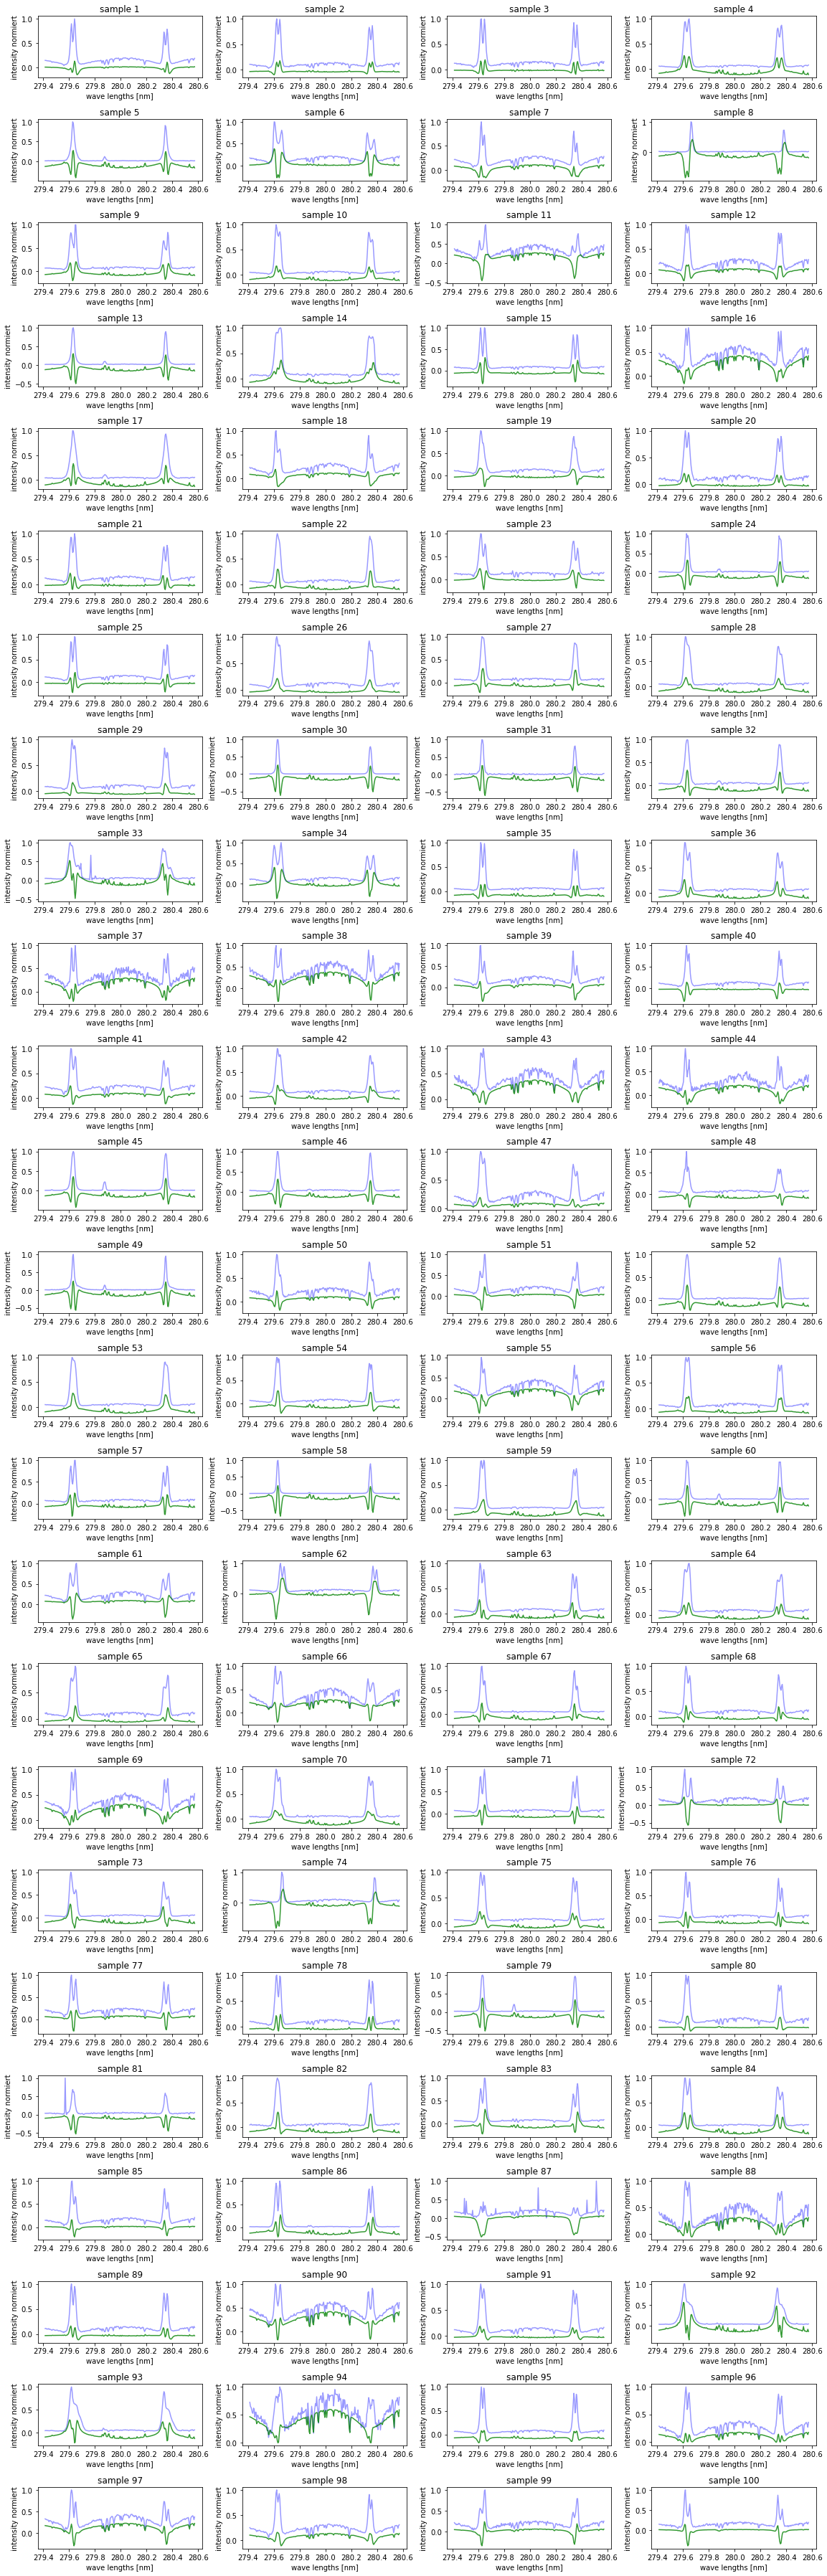

In [27]:
# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(25, 4, figsize=(16,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_100.shape[1])

for i in range(df_iris_100.shape[0]):
    ax[i].plot(x_label_all, df_iris_100[i, :], color='blue', alpha=0.4, label='original')
    ax[i].plot(x_label_all, X_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

#plt.legend()        
plt.tight_layout()
plt.show()

**Projiziere die Spektren auf die ersten beiden Principal Components**

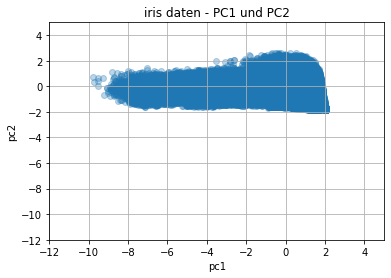

In [29]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
PCA_out_1_2 = pca.fit_transform(df_iris, 2)

#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(PCA_out_1_2[:,0],  PCA_out_1_2[:,1], alpha=0.3)
plt.xlim(-12, 5)
plt.ylim(-12, 5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('iris daten - PC1 und PC2')
plt.grid()
plt.show()

YOUR ANSWER HERE

### Aufgabe 5 (10 Punkte)

Nun wenden wir uns Non-negative Matrix Factorization (NMF) zu.  

Verwende NMF von scikit-learn, um eine Zerlegung der Datenmatrix zu berechnen.  

Entwickle also ein sinnvolles NMF-Modell für den Sonnenspektren Datensatz. Wie kannst du hier die Anzahl Komponenten wählen?

Ein Datenpunkt soll in deinem Ansatz nur durch einen kleinen Teil der Komponenten repräsentiert werden können.
Inwiefern hat dies einen Einfluss auf die Wahl der Regularisierung?  

Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen, begründe.

Rekonstruiere die Spektren aus den gefundenen Komponenten und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  

Zeichne die gefundenen Komponenten.  

Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?  


Diskutiere sämtliche Ergebnisse und vergleiche die Resultate mit Aufgabe 3.

**NMF von sklearn** und **Entwickle ein NMF-Modell** für den Sonnenspektren Datensatz  
[Doku NMF](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html). Folgend wird mit `NMF().get_params().keys()` welche Parameter für das Modell zur Verfügung stehen. Mit `'n_components'` kann die Anzahl Principal Components bestimmt werden.

In [ ]:
# YOUR CODE HERE
from sklearn.decomposition import NMF

NMF().get_params().keys()

In [ ]:
# Modell erstellen
n_components = 2
model_nmf = NMF(n_components=n_components, init='random', random_state=42)
nmf_W = model_nmf.fit_transform(df_iris_cut)
nmf_H = model_nmf.components_

print(f'{nmf_W.shape=}, {nmf_H.shape=}')

**Einfluss der Regularisierung**  
Mit `alpha` kann ein Regularisierungs Parameter gesetzt werden, wenn $\alpha = 0$ dann findet keine Regularisierung. In der nächsten Version (1.2) wird dieser Parameter jedoch entfernt und es stehen nur noch `'alpha_W'` und `'alpha_H'` zur Verfügung. Somit konnen die Matrizen W und H seperat Regularisiert werden. Mit `'same'` werden Parameter gleich gesetzt. 

Mit `alpha_W` und `alpha_H` werden die Gewichte des Algorithmus gesetzt, somit kann der Einfluss der Matrizen eingeschränkt, oder eben regularisiert werden.

**Welche übergeordneten ML-Entwicklungs- und Model-Selection-Prinzipien kannst du hier einbringen**  
EoE page 553ff (572)

- NMF ist eine weitere Möglichkeit (neben z.B. PCA) Daten zu reduzieren, dabei werden nicht negative Matrizen vorausgesetzt. Daten von Texten (Anzahl Worte) oder Bildern (Pixel und Farbtiefe) enthalten rein positive Daten.
- Element of statistical Learning (Seite 554) beschreibt dass NMF, im Vergleich zu anderen Algorithmen (wie VQ, PCA), sich Strukturen oder Metadaten merken kann. Anhand von Bildern zeigt sich dies im Buchbeispiel, als lernen der Merkmale von Gesichtern (Nasen, Augen, Mund, etc).
- Weiter wird erwähnt dass die Datenreduktion von NMF nicht zwingend einzigartig ist, dass heisst dass je nach Startwerten in W und H (die benötigt werden um mit Gradient Descent eine Annäherung an das Minimum zu suchen) andere Ergebnisse entstehen können. Die Reproduzierbarkeit leidet darunter, es könnte wohl helfen die jeweiligen Startparameter zu dokumentiert oder festzuhalten.
- 

**Rekonstruiere die Spektren aus den gefundenen Komponenten** und zeichne Original und Rekonstruktion für 100 Beispiele in den gleichen Plot.  
Die Rekonstruktion aus dem NMFf-Modell erhält man durch das Produkt von W @ H ~ df_iris.

In [ ]:
# Rekonstruktion
nmf_rekonstrukt = nmf_W @ nmf_H
print(f'{nmf_rekonstrukt.shape=}')
nmf_rekonstrukt[:1,:10]

In [ ]:
# Original Datensatz
df_iris_cut[:1,:10]

In [ ]:
# Nimm 100 zufällige Beipiele aus dem Datenset
# -> gleicher Index wie in Aufgabe 3
df_iris_cut_100 = df_iris_cut[idx_rnd, :].copy()
nmf_rekonstrukt_100 = X_rekonstrukt[idx_rnd, :].copy()

# plote die zufällige 100 Beispiele
fig, ax = plt.subplots(25, 4, figsize=(16,50))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, df_iris_cut_100.shape[1])

for i in range(df_iris_cut_100.shape[0]):
    ax[i].plot(x_label_all, df_iris_cut_100[i, :], color='blue', alpha=0.4, label='original')
    ax[i].plot(x_label_all, nmf_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')    

#plt.legend()        
plt.tight_layout()
plt.show()

**Zeichne die gefundenen Komponenten**  
zeichen PC1 auf der X-Achse und PC2 auf der Y-Achse

In [ ]:
# PCA Analysis
# Drehen der Daten mit den Eigenvektoren
#zeichne der Daten entlang der grössten Principal Komponente
plt.scatter(nmf_W[:,0],  nmf_W[:,1])
#plt.ylim(-5, 5)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('iris daten - NMF Modell, PC1 und PC2')
plt.grid()
plt.show()

**Wie kannst du visualisieren und aufzeigen, dass die Sonnenspektren tatsächlich nur aus wenigen Komponenten rekonstruiert werden?**

In [ ]:
#np.testing.assert_array_almost_equal(X, df_iris_5k, decimal=1)

YOUR ANSWER HERE

### Aufgabe 6 - K-Means (8 Punkte)

K-Means ist ein Clustering-Algorithmus. Mit K-Means können wir einen Datensatz in $K$ Gruppen (Cluster) unterteilen. Eine Funktion $C(i) \in \{ 1, \dots, K \}$ ordnet dabei jedem Datenpunkt $i$ einen Cluster $k$ zu. 

Die $K$ Gruppen werden dabei über $K$ Zentroiden, Clustermittelpunkte $\mu_k$, charakterisiert. Datenpunkte (Pixelwerte in unserem Fall) werden dem Zentroiden zugeordnet, der ihnen am nächsten ist. Der K-Means-Algorithmus (siehe unten) findet dabei ein lokales Minimum für die Funktion

$$
J(C) = \sum_{k=1}^{K} \sum_{C(i)=k} ||x^{(i)} - \mu_k||^2
$$

Er minimiert also den summierten quadrierten Abstand der Datenpunkte zu ihrem Zentroiden.  

Da der Algorithmus nur ein lokales Minimum findet, initialisiert man den Algorithmus in der Regel mehrfach und behält am Schluss die Lösung mit dem kleinsten Wert für die Kostenfunktion.

Ein Durchlauf / eine Initialisierung des Algorithmus funktioniert wie folgt:

---

#### K-Means Algorithmus

*Initialisierung*: Wähle $K$ Zentroiden zufällig aus den gegebenen Datenpunkten.

*Schritt 1*: Für gegebene Zentroiden $(\mu_1, .., \mu_k)$ ordne man sämtliche Datenpunkte jeweils jenem Cluster zu, dessen Zentroid dem jeweiligen Datenpunkt am nächsten ist. Also


\begin{eqnarray}
C(i) = \mathsf{argmin}_k ||x^{(i)} - \mu_k||^2
\end{eqnarray}


*Schritt 2*: Für eine gegebene Cluster-Zuordnung $C$ minimiere man die 'Gesamt-Cluster-Varianz' durch Aktualisieren der Zentroiden mit:


\begin{eqnarray}
\mu_k = \frac{1}{N_k} \sum_{C(i)=k}x^{(i)}
\end{eqnarray}

$N_k$ sind die Anzahl Datenpunkte, die k zugeordnet sind.  

*Schritt 3*: Man wiederhole die Schritte 1 und 2 bis sich die Zentroiden nicht mehr verändern oder der Wert der Funktion $J(C)$ sich kaum mehr verbessert.

---

Vervollständige die folgende Klasse, welche den K-Means-Algorithmus umsetzen soll.  

Zeige anhand eines konstruierten Beispiels, dass dein Algorithmus zuverlässig funktioniert.  
Verwende zur Konstruktion des Beispiels `sklearn.datasets.make_blobs`.

In [ ]:
# If you want, you can use the following function to efficiently compute pairwise distances.
# Read the docstring to learn how to use it.
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
import matplotlib

class KMeans(object):
    
    def __init__(self, k=3, n_inits=10, random_seed=None, print_info=False):
        '''KMeans clustering algorithm.
        
        Parameters
        ----------
        k: number of clusters
        n_intis: number of initializations
        '''
        # Parameters
        self.k = k
        self.n_inits = n_inits
        self.random_seed = random_seed
        self.max_iter = 10
        self.print_info = print_info
        
        # The following attributes will be computed through execution of the
        # KMeans algorithm in the fit method.
        self.centroids_ = np.array([])
        self.centroids_way_ = np.array([])
        self.labels_ = np.array([])
        self.cost_ = 999
        self.cost_all_ = np.array([])
        self.num_iterations_ = None
        self.random_init_ = None
    
    def check_random_init():
        pass
    
    def fit(self, X):
        '''Clusters the dataset X into k clusters.
        '''  
        X = np.array(X)
        
        # Anzahl Ausführungen von KMeans
        for n in range(self.n_inits):
            
            # setze k random init mit random Datenpunkte k < X.shape[0]
            np.random.seed(self.random_seed)
            init_fail = False
            idx_rnd = np.random.randint(0, X.shape[0], self.k)
            random_data_sample = X[idx_rnd]  
            self.centroids_ = X[idx_rnd] 
            
            # Mittelwerte der Zentroide solange neu setzen bis sich diese nicht mehr verändern
            iteration = 0
            while True:  
                #print('iteration: ', self.num_iterations_)
                #print('max iteration: ', self.max_iter)
                
                #print('X shape: ', X.shape)                
                #print('zent shape: ', self.centroids_.shape)
                # Berechne alle Distanzen der Datenpunkte zu cluster punkten mit cdist
                dist_datapoints = cdist(X, self.centroids_, 'euclidean')
                # minimale Distnaz index suchen und Cluster point zu ordnen (array -> label)
                min_dist_points_idx = np.argmin(dist_datapoints, axis=1)
                self.label_ = min_dist_points_idx               
                #print('label len. ', self.label_.shape)
                
                # Berechnen der neuen Mittelwerte der cluster (Zentroiden)
                X_y = np.concatenate((X, self.label_.reshape(-1,1)), axis=1)
                Zentroids = np.array([])
                Zentroids_way = []
                for i in range(self.k):
                    # Punkte die zu einem Cluster / Zentroid gehören
                    zentroid_points = X_y[X_y[:, -1] == i][:,:-1]
                    if zentroid_points.shape[0] == 0:
                        init_fail = True
                        #print('init_fail')
                        break
                        
                    # Neuer Mittelwert berechnen
                    #print('zen_points', zentroid_points)
                    zentroid_mean = np.mean(zentroid_points, axis=0)
                    Zentroids = np.append(Zentroids, zentroid_mean)
                    Zentroids_way.append(Zentroids.reshape(-1, X.shape[1]))
                Zentroids = Zentroids.reshape(-1, X.shape[1])    
                #print('new zent mean: ', Zentroids.shape)
                
                if init_fail == False:
                    # prüfen ob Mittelwert der Zentroiden unterschiedlich, wenn gleich dann Abbrechen
                    if not np.allclose(self.centroids_, Zentroids):
                        self.centroids_ = Zentroids
                    else:
                        if self.print_info: print(f'found mean cluster after {self.num_iterations_} Iterations')
                        break 
                    # es kann passieren wen ranodm state nicht definiert ist, das ein random init gefunden
                    # wird der nicht nicht konvergiert (Mittelpunkt Zentroid Berechnung)
                    if iteration >= self.max_iter:
                        self.centroids_ = Zentroids
                        if self.print_info: print(f'{self.max_iter} max Iterations reached')
                        break
                else:
                    break
                
                iteration += 1
                
            # Vergleiche die n Anzahl KMeans und wähle die tiefste Kosten Funktion
            J = self.cost_function(X)
            if self.print_info: print('J: ', J)
            self.cost_all_ = np.append(self.cost_all_, J)
            
            if J < self.cost_:
                self.cost_ = J
                best_centroids = self.centroids_
                self.random_init_ = random_data_sample
                self.centroids_way_ = Zentroids_way
                self.num_iterations_ = iteration
                
        # setzen der besten Zentroiden
        self.centroids_ = best_centroids                  
        return self
  
    def cost_function(self, X):
        '''Computes the KMeans cost function for a given dataset X.
        '''
        # YOUR CODE HERE
        # Berechnen der neuen Mittelwerte der cluster (Zentroiden)
        X_y = np.concatenate((X, self.label_.reshape(-1,1)), axis=1)
        sum_zentroids_all = np.array([])
        for i in range(self.k):
            # Punkte die zu einem Cluster / Zentroid gehören
            zentroid_points = X_y[X_y[:, -1] == i][:,:-1]
            
            # Wenn Random init gleiche samples aus einem Cluster nimmt dann steckt man fest
            # hier abbrechen und Kosten hoch setzen
            if zentroid_points.shape[0] == 0:
                return 1
            
            # summe von den Daten berechnen die im selben Cluster (c) sind || x(i) - mu(c)(i) berechnen
            sum_zent_single_cluster = np.sum(np.linalg.norm(zentroid_points - self.centroids_[i]))
            sum_zentroids_all = np.append(sum_zentroids_all, sum_zent_single_cluster)
        
        J = (1/X.shape[0]) * np.sum(sum_zentroids_all)
        return J
        
        
    
    def predict(self, X):
        '''Assigns each data point in X to the closest cluster.
        
        Can only be used after the clustering algorithm has been executed.
        '''
        # Berechne alle Distanzen der Datenpunkte zu cluster punkten mit cdist
        dist_datapoints = cdist(X, self.centroids_, 'euclidean')
        # minimale Distnaz index suchen und Cluster point zu ordnen
        min_dist_points_idx = np.argmin(dist_datapoints, axis=1)
        y_predict = min_dist_points_idx 
        
        return y_predict
  
    # further methods go here
    # YOUR CODE HERE
    def plot_costs(self):
        # Ausgeben der minimalen Kosten gefunden
        min_cost = self.cost_
        min_cost_idx = np.argmin(self.cost_all_)

        plt.plot(np.arange(len(self.cost_all_)), self.cost_all_)
        plt.scatter(min_cost_idx, min_cost, c='red', label=f'min cost: {min_cost.round(4)}')
        plt.xlabel('n KMean Iterations')
        plt.ylabel(r'Kostenfunktion $J$')
        plt.title('Kostenfunktion mit random init je Iteration')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_random_init(self, X, xlabel='X', ylabel='Y'):
        random_init = self.random_init_
        
        plt.scatter(X[:,0], X[:,1])
        plt.scatter(random_init[:, 0], random_init[:, 1], c='red', label='random sample init')
        plt.scatter(self.centroids_[:, 0], self.centroids_[:, 1], c='purple', marker='x', label='Zentroid Mittelpunkt')
        #for i in range(self.num_iterations_):
        #    cent_way_step_i = self.centroids_way_[i]
        #    plt.scatter(cent_way_step_i[i, 0], cent_way_step_i[i, 1], c='grey', label='Zentroid Weg')
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Auswahl der zufälligen Datenpunkten (lucky or unlucky)')
        plt.legend()
        plt.grid()
        plt.show()
        
    def plot_predict(self, X, y_predict, xlabel='X', ylabel='Y'):
        X_y_kmean = np.concatenate((X, y_predict.reshape(-1,1)), axis=1)
        plt.scatter(X_y_kmean[:,0], X_y_kmean[:,1], c=X_y_kmean[:,2], cmap=cmap)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title('Datenpunkte und Cluster zuordnung KMeans')
        #plt.legend()
        plt.grid()
        plt.show()

**Beispiel Daten erzeugen** mit sklearn.datasets.make_blobs

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib

X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)
X_y_org = np.concatenate((X, y.reshape(-1,1)), axis=1)
X[:2,:]

In [ ]:
np.mean(X[:2,:], axis=0)

In [ ]:
# zeigen der orginalen Cluster zuordnung
cmap = cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue'])

plt.scatter(X_y_org[:,0], X_y_org[:,1], c=X_y_org[:,2], cmap=cmap)
plt.grid()

**Testen der KMeans() Klasse**  
Die Initialisierung der zufälligen Datenpunkte spielen eine wichtige Rolle, da es je nach Startwert zu anderen Ergebnissen kommen kann. Die Empfehlung ist die KMeans Clustering öfters auszuführen um einige Kombinationen zu testen. Mit der Kostenfunktion wird dann die beste Aufteilung der Daten bewertet und die Werte entsprechend den minimalen Kosten verwendet. Auch ist die Wahl von $k$ wichtig, in den Beispiel daten sind deutlich drei Cluster zu erkennen. Soll ein Modell mit vier Cluster erstellt werden, geht das ohne Probleme, nur wird dann ein Cluster in zwei Untercluster aufgeteilt.  

Folgend sollen ein paar Beispiele die unterschiedlichen Situationen verdeutlichen (dabei werden random_seed Werte womit Kmeans nur mit einer Samplewahl zurecht kommen muss):
1. Beispiel: zufällige Datenpunkte wurden jeweils aus einem Cluster gezogen (erreicht mit `random_seed=13`). 
1. Beispiel: zwei der zufällige Datenpunkte kommen aus dem selben Cluster (erreicht mit `random_seed=1`).
1. Beispiel: Die Daten zeigen drei Cluster, KMeans soll aber vier Cluster aufteilen.
1. Beispiel: KMeans mit mehreren durchläufen, bis die tiefste Kostenfunktion gefunden wurde (`random_seed=None`)  

*Bemerkung: wird ein `random_seed` gesetzt werden alle samples gleich gezogen, daher ist der Wert der Kostenfunktion auch immer gleich*

1. Beispiel:  
Random Sample finden sich in jedem Cluster und die Mittelwerte der Zentroiden können schnell konvergieren.

In [ ]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=10, random_seed=13, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

2. Beispiel:  
Fallen zwei der random Datenpunkte in einen Cluster, fällt die Aufteilung bereits nicht mehr gleich aus. Der KMeans Algorithmus verschiebt die Mittelpunkte bis die Kostenfunktion minimal ist. Dieses Beispiel zeigt warum KMeans öfter ausgeführt werden sollte. Mehrer Versuchen erhöhen die Chancen für eine 'beste' Cluster Aufteilung der Daten. 

In [ ]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=10, random_seed=1, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

3. Beispiel:  
Die Aufteilung in mehr Cluster geschieht ohne Probleme, je mehr Cluster verwendet werden umso genauer kann die Kostenfunktion werden. Wie genau $k$ gewählt werden muss folgt in einer späteren Erklärung. Hier soll gezeigt werden dass die Wahl von $k$ entscheidend ist. Die Beispieldaten haben drei Cluster, durch die Wahl von $k=4$ wurde einer der Cluster weiter aufgeteilt.

In [ ]:
# Modell erstellen
kmeans_model = KMeans(k=4, n_inits=10, random_seed=13, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

4. Beispiel:  
Hier wird KMeans wird öfter initalisiert und die gefundenen Werte zum minimalen Kostenfunktionwert verwendet. In diesem Beispiel sehen wir, auch wenn die Wahl der Initial Datenpunkte im selben Cluster starten, können die Zentroide so verschoben werden dass die Kostenfunktion minimal wird und die Mittelpunkte der Cluster gefunden werden.  
Es gibt Situationen in denen Random Datenpunkte keine gute Initialisierung sind, diese werden aber von KMeans verworfen (zum Beispiel wenn ein Cluster nicht zugeordnet wird - Slicing nach Klassen dann nicht möglich).  

*Bemerkung: folgender Code kann mehrmals ausgeführt werden, man sieht die unterschiedlich gewählten random Datenpunkte. Diese führen aber jeweils zur selben Clusterbildung*

In [ ]:
# Modell erstellen
kmeans_model = KMeans(k=3, n_inits=10, random_seed=None, print_info=False)
kmeans_model.fit(X)

# Plot Kosten mit random iterationen
kmeans_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_model.plot_random_init(X)

# Prediction KMean
y_pred = kmeans_model.predict(X)

# Plot Prediction
kmeans_model.plot_predict(X, y_pred)

**Testen der Distanz Berechnung von cdist()** mit der numpy Norm Funktion  
$ dist_{xo} = ||x_0 - \mu||^2$, $x_o$ = Datenpunkt, $\mu$ = Cluster Punkte

`cdist()` gibt die Distanzen auf den Zeilen aus, mit `np.argmin(axis=1)` den Index mit kürzeste Distanz suchen und Cluster zuordnen.

In [ ]:
from scipy.spatial.distance import cdist

# random init der Cluster durch 3 Datenpunkte
np.random.seed(42)
idx_rnd = np.random.randint(0, X.shape[0], 3)
cluster_points = X[idx_rnd, :]
#print(cluster_points)

# Berechnen der Euklidischen Distanz mit numpy Norm
x0_d1, x0_d2, x0_d3 = np.linalg.norm(X[0,:] - cluster_points[0]), np.linalg.norm(X[0,:] - cluster_points[1]), np.linalg.norm(X[0,:] - cluster_points[2])
print('Prüfen Norm Berechnung np.linalg.norm():')
print([x0_d1, x0_d2, x0_d3])
print()

# Berechnen der eukldischen Distanz
cdist_norm = cdist(X, cluster_points, 'euclidean')
print('Prüfen Norm Berechnung cdist():')
print(cdist_norm[:4, :])
print()
print(f'x0 kleinste Distanz an index: cluster_points[{np.argmin(cdist_norm[0, :])}]')

# min dist index als Array
print()
argmin_idx = np.argmin(cdist_norm, axis=1)
print(f'index min Distanz Datenpunkte: {argmin_idx[:4]}')

### Aufgabe 7 - K-Means auf Sonnenspektren (7 Punkte)

Beschreibe nun in Worten was es bedeutet, diese Spektren zu clustern.

Nimm ein Clustering mit deiner Implementierung von KMeans der Sonnenspektren vor.  

Bestimme einen sinnvollen Wert für $K$. Erläutere dabei dein Vorgehen und diskutiere auch alternative Möglichkeiten dafür.  

Zeichne die Zentroiden.  

Beschreibe und diskutiere deine Resultate.  
Lege dabei Unterschiede von Zentroiden und Principal Components, sowie NMF Komponenten aus der ersten ule Mini-Challenge dar.  

Könnte man K-Means auch als Matrizen-Zerlegung betrachten? Wie?

**Beschreibung Cluster der Sonnenspektren**  


In [ ]:
X_iris = df_iris_cut.copy()
X_iris.shape

**Cluster auf den Sonnenspektren**

In [ ]:
# Modell erstellen
kmeans_iris_model = KMeans(k=3, n_inits=50, random_seed=None, print_info=False)
kmeans_iris_model.fit(X_iris)

# Plot Kosten mit random iterationen
print(kmeans_iris_model.cost_)
kmeans_iris_model.plot_costs()

# Prediction KMean
y_pred = kmeans_iris_model.predict(X_iris)


**Bestimme einen sinnvolen Wert für $K$**  
Um einen sinnvolen Wert für K zu suchen, sollen mehrer K für ein KMean Modell ausprobiert werden, die Kosten zu den unterschiedlichen $K$ Werten soll geplottet werden.

In [ ]:
np.arange(5, 100, 5)

In [ ]:
# K Werte festlegen
k_test = np.arange(5, 100, 5)
cost_all = []

for k in k_test:
    # Modell erstellen
    kmeans_iris_model_k = KMeans(k=k, n_inits=50, random_seed=None, print_info=False)
    kmeans_iris_model_k.fit(X_iris)
    # minimale Kosten des Modells mit k speichern
    cost_all.append(kmeans_iris_model_k.cost_)
    
# Kosten zeichnen
plt.plot(k_test, cost_all)
plt.scatter(k_test, cost_all)
plt.grid()
plt.show()

**Zeichnen der Zentroide**  
Wie in einem mehrdimensiolen Raum?

**Beschreiben der Resultate**  


**KMeans als Matrizen Zerlegung betrachten?**

YOUR ANSWER HERE

### Aufgabe 8 (5 Punkte)

Visualisiere die Cluster im Raum der ersten beiden Principal Components zusammen mit ihren Zentroiden.  

Beschreibe und diskutiere deine Resultate. Entsprechen sie deinen Erwartungen?

In [ ]:
# PCA 
pca_iris_model = PCA()
pca_iris = pca_iris_model.fit_transform(df_iris_cut_cent, 2)
pca_iris.shape

In [ ]:
# Modell erstellen
kmeans_iris_model = KMeans(k=2, n_inits=20, random_seed=None, print_info=False)
kmeans_iris_model.fit(pca_iris)

# Plot Kosten mit random iterationen
kmeans_iris_model.plot_costs()

# Plot ranodm sample getroffen
kmeans_iris_model.plot_random_init(pca_iris, xlabel='PC1', ylabel='PC2')

# Prediction KMean
y_pred = kmeans_iris_model.predict(pca_iris)

# Plot Prediction
kmeans_iris_model.plot_predict(pca_iris, y_pred, xlabel='PC1', ylabel='PC2')

Der KMeans Algorithmus kann beliebig oft ausgeführt werden und landen jeweils bei der gleichen Cluster Aufteilung (Einteilung der Daten bei $ca. x= -1$ in links, rechts). Somit kann gezeigt werden das ein Clustering der Datenpunkten möglich ist. Durch die PCA können die reduzuerten Daten jedoch nicht mehr pysikalisch in Wellenlängen erklärt werden, was eine Interpretation aus meiner Sicht schwierig macht. Modell können jedoch von den reduzierten Daten profitieren und trotzdem Muster erkennen.

**Folgend soll versucht werden die Daten mit den Cluster zu rekonstruiren**  
Die Daten werden folgend rekonstruiert und die gefunden Cluster Aufteilung angefügt. Dabei sollen 10 zufällige samples gezeichnet und vergleichen werden

In [ ]:
X_rekonstrukt = pca_iris_model.rekonstruktion(pca_iris, 2)
print(f'Rekonstrukions shape: {X_rekonstrukt.shape}')

# Cluster prediction beifügen
X_rekonstrukt_pred = np.concatenate((X_rekonstrukt, y_pred.reshape(-1,1)), axis=1)
print(f'Rekonstrukions and prediction shape: {X_rekonstrukt_pred.shape}')

In [ ]:
X_rekonstrukt_pred[X_rekonstrukt_pred[:, -1] == 1].shape

In [ ]:
np.random.seed(42)

df_iris_cluster0 = X_rekonstrukt_pred[X_rekonstrukt_pred[:, -1] == 0].copy()
df_iris_cluster1 = X_rekonstrukt_pred[X_rekonstrukt_pred[:, -1] == 1].copy()

# 10 zufällige Beispiele der Cluster auswählen
idx_rnd0 = np.random.randint(0, df_iris_cluster0.shape[0], 8)
idx_rnd1 = np.random.randint(0, df_iris_cluster1.shape[0], 8)

# Nimm 20 zufällige Beipiele aus dem Datenset je Cluster
df_iris_cluster0_10 = X_rekonstrukt[idx_rnd0, :].copy()
df_iris_cluster1_10 = X_rekonstrukt[idx_rnd1, :].copy()

# plote die zufällige 10 Beispiele
fig, ax = plt.subplots(2, 4, figsize=(16,6))
ax = ax.flatten()

# Wellenlänge zwischen 279.414nm und 280.572nm, verwende linspace für 240 Punkte dazwischen
x_label_all = np.linspace(279.414, 280.572, X_rekonstrukt.shape[1])

for i in range(df_iris_cluster0_10.shape[0]):
    ax[i].plot(x_label_all, df_iris_cluster0_10[i, :], color='blue', alpha=0.6, label='original')
    #ax[i].plot(x_label_all, nmf_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}, cluster 0')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert')
    
#plt.legend()        
plt.tight_layout()
plt.show()

# plote die zufällige 10 Beispiele
fig, ax = plt.subplots(2, 4, figsize=(16,6))
ax = ax.flatten()
    
for i in range(df_iris_cluster1_10.shape[0]):
    ax[i].plot(x_label_all, df_iris_cluster1_10[i, :], color='green', alpha=0.6, label='original')
    #ax[i].plot(x_label_all, nmf_rekonstrukt_100[i, :], color='green', alpha=0.8, label='rekon')
    ax[i].set_title(f'sample {i+1}, cluster 1')
    ax[i].set_xlabel('wave lengths [nm]')
    ax[i].set_ylabel('intensity normiert') 

#plt.legend()        
plt.tight_layout()
plt.show()

Blau zeigen die Messdaten mit Klasse 0 und Grün die Messdaten mit der Klasse 1. Eine Struktur ist schwierig zu erkennen, man könnte evtl erkennen das bei der Klasse 1 (grün) vermehrt beobachtet werden kann, dass die Wellenlängen zwischen den zwei Picks weniger flach ist, sich also mehr intensität zwischen den Wellenlängen ~279.6Nm und 280.4 Nm finden lassen.  

### Aufgabe 9 (4 Punkte)

Beschreibe abschliessend die drei hier verwendeten *Unsupervised Learning*-Methoden miteinander. Was zeichnet sie aus, was unterscheidet sie?

YOUR ANSWER HERE